# Summary

This Notebook compiles all the code for the visualizations used in the presentation and for exploratory data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#selected datasets that produced the highest silhouette scores

teledf = pd.read_csv('teledf.csv')
teledf_bins = pd.read_csv('teledf_bins.csv')
teledf_churn = pd.read_csv('teledf_churn.csv')
teledf_nochurn = pd.read_csv('teledf_nochurn.csv')

In [44]:
teledf_churn.shape

(483, 24)

In [3]:
#pipeline for all data
#silhouette score: 0.533

X_all = teledf_bins.drop(columns=['State','Area code'])
scaler_all = MinMaxScaler()
pca_all = PCA(n_components=2)
db_all = DBSCAN(metric='cosine', min_samples=5, eps=0.2)

X_all_scaled = scaler_all.fit_transform(X_all)
X_all_pca = pca_all.fit_transform(X_all_scaled)
db_all.fit(X_all_pca)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [4]:
#pipeline for churned data only
#silhouette score: 0.515

X_churn = teledf_churn.drop(columns=['State','Area code'])
scaler_churn = MinMaxScaler()
pca_churn = PCA(n_components=3)
db_churn = DBSCAN(metric='cosine', min_samples=5, eps=0.1)

X_churn_scaled = scaler_churn.fit_transform(X_churn)
X_churn_pca = pca_churn.fit_transform(X_churn_scaled)
db_churn.fit(X_churn_pca)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [26]:
#pipeline for unchurned data only
#silhouette score: 0.595

X_nochurn = teledf_nochurn.drop(columns=['State','Area code'])
scaler_nochurn = MinMaxScaler()
pca_nochurn = PCA(n_components=3)
db_nochurn = DBSCAN(metric='cosine', min_samples=5, eps=0.1)

X_nochurn_scaled = scaler_nochurn.fit_transform(X_nochurn)
X_nochurn_pca = pca_nochurn.fit_transform(X_nochurn_scaled)
db_nochurn.fit(X_nochurn_pca)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [6]:
#labelling original datasets

teledf_bins['labels'] = db_all.labels_
teledf_bins.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl calls,Customer service calls,Churn,Bin_Total day minutes,Bin_Total day calls,...,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Total calls,Bin_Total charge,Bin_Account length,labels
0,KS,415,0,1,25,3,1,0,8,7,...,6,5,6,5,5,8,5,8,6,0
1,OH,415,0,1,26,3,1,0,5,8,...,7,5,7,7,7,6,7,5,5,0
2,NJ,415,0,0,0,5,0,0,7,7,...,4,5,4,7,7,5,7,6,6,1
3,OH,408,1,0,0,7,2,0,9,5,...,5,4,5,4,4,5,3,6,4,1
4,OK,415,1,0,0,3,3,0,5,7,...,5,7,5,6,6,4,8,4,4,1


In [7]:
teledf['labels'] = db_all.labels_

In [8]:
teledf_churn['labels'] = db_churn.labels_
teledf_churn.sample(10)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl calls,Customer service calls,Churn,Bin_Total day minutes,Bin_Total day calls,...,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Total calls,Bin_Total charge,Bin_Account length,labels
298,RI,510,1,0,0,2,1,1,8,8,...,8,7,8,7,7,8,8,7,5,3
422,NY,415,0,0,0,4,4,1,5,8,...,7,3,7,8,8,5,5,4,5,0
43,OH,510,0,0,0,4,0,1,8,5,...,6,7,6,5,5,7,4,8,5,0
395,KS,408,1,0,0,2,1,1,2,7,...,6,4,6,6,6,4,6,3,4,3
301,IA,415,0,0,0,3,4,1,9,9,...,5,3,5,4,4,7,5,8,2,0
412,CA,510,0,0,0,10,5,1,5,6,...,6,4,6,5,5,6,4,5,4,0
463,ND,408,0,0,0,5,1,1,7,9,...,6,5,6,5,5,8,9,8,5,0
165,OK,510,0,0,0,6,0,1,10,5,...,7,5,7,6,6,9,5,9,4,0
327,MS,408,0,0,0,5,1,1,4,7,...,6,6,6,4,4,5,8,4,4,0
174,DC,408,0,0,0,6,1,1,6,9,...,7,5,7,7,7,7,7,6,3,0


In [27]:
teledf_nochurn['labels'] = db_nochurn.labels_
teledf_nochurn.sample(10)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl calls,Customer service calls,Churn,Bin_Total day minutes,Bin_Total day calls,...,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Total calls,Bin_Total charge,Bin_Account length,labels
1335,WA,415,0,0,0,3,1,0,7,4,...,3,4,3,5,5,6,2,7,5,1
660,VT,415,0,0,0,2,0,0,7,6,...,5,6,5,4,4,5,6,6,6,1
157,FL,415,0,0,0,3,0,0,5,6,...,5,7,5,6,6,4,5,5,4,1
2719,HI,510,0,0,0,9,2,0,4,8,...,6,5,6,6,6,6,6,5,5,1
2100,AL,510,0,0,0,8,3,0,6,6,...,4,6,4,4,4,5,5,6,5,1
2165,LA,415,0,0,0,4,3,0,6,6,...,5,5,5,5,5,6,5,6,3,1
1386,OR,415,0,0,0,2,2,0,6,5,...,4,5,4,6,6,5,4,6,4,1
2546,AZ,510,0,0,0,2,0,0,8,6,...,5,4,5,7,7,5,5,7,3,1
74,AZ,408,0,0,0,4,4,0,7,4,...,5,6,5,6,6,6,5,7,4,1
704,FL,415,0,0,0,3,3,0,6,7,...,4,7,4,6,6,5,7,5,7,1


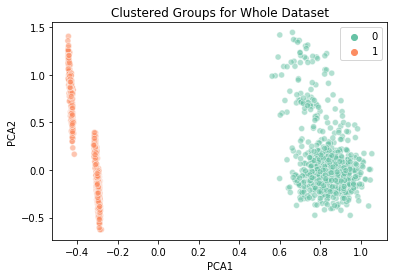

In [10]:
#pca visualization

sns.scatterplot(X_all_pca[:,0], X_all_pca[:,1], 
                    data = teledf_bins, hue = db_all.labels_, alpha = 0.5, palette='Set2')

plt.title('Clustered Groups for Whole Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

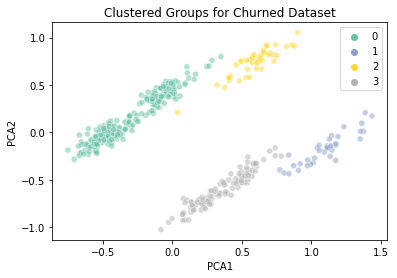

In [11]:
sns.scatterplot(X_churn_pca[:,0], X_churn_pca[:,1], 
                    data = teledf, hue = db_churn.labels_, alpha = 0.5, palette='Set2')

plt.title('Clustered Groups for Churned Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

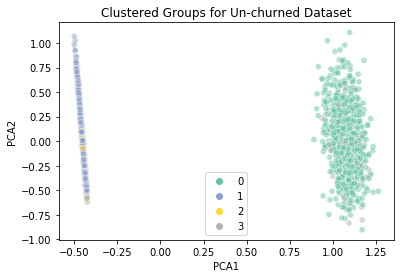

In [28]:
sns.scatterplot(X_nochurn_pca[:,0], X_nochurn_pca[:,1], 
                    data = teledf_nochurn, hue = db_nochurn.labels_, alpha = 0.5, palette='Set2')

plt.title('Clustered Groups for Un-churned Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [13]:
#using correlation for optimal pair plots

teledf_bins.corr()['labels'].sort_values().abs()

Voice mail plan            1.000000
Number vmail messages      0.956927
Bin_Total eve minutes      0.024669
Bin_Total eve charge       0.024257
Bin_Total minutes          0.017818
Bin_Total night calls      0.010163
Total intl calls           0.007618
Bin_Total night charge     0.006999
Bin_Total night minutes    0.006351
International plan         0.006006
Bin_Total charge           0.002147
Bin_Total day charge       0.001852
Bin_Total day minutes      0.001452
Area code                  0.000747
Bin_Total intl minutes     0.001419
Bin_Total intl charge      0.001419
Bin_Account length         0.001460
Bin_Total calls            0.004508
Bin_Total eve calls        0.010465
Bin_Total day calls        0.014631
Customer service calls     0.017824
Churn                      0.102148
labels                     1.000000
Name: labels, dtype: float64

C:\Users\AK\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AK\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


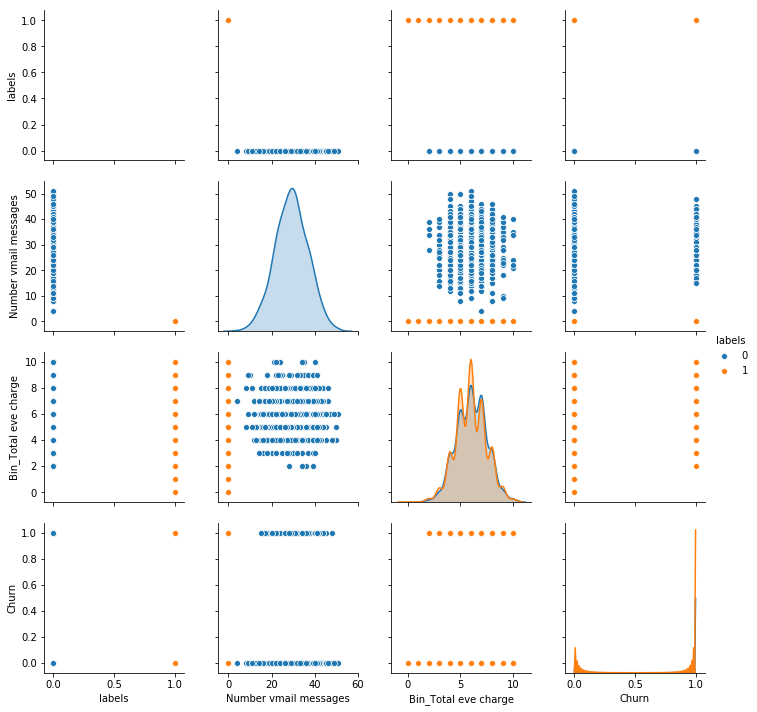

In [14]:
#pairplots

sns.pairplot(teledf_bins[['labels','Number vmail messages','Bin_Total eve charge', 'Churn']], hue = 'labels')


Text(0, 0.5, 'Total Evening Charge (bucket)')

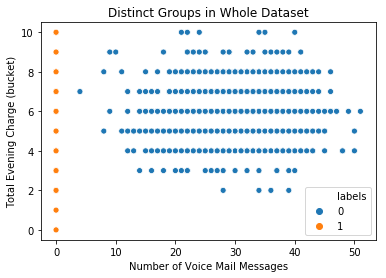

In [15]:
sns.scatterplot(data=teledf_bins, x='Number vmail messages', y='Bin_Total eve charge', hue='labels')
plt.title('Distinct Groups in Whole Dataset')
plt.xlabel('Number of Voice Mail Messages')
plt.ylabel('Total Evening Charge (bucket)')

In [16]:
teledf_churn.corr()['labels'].sort_values().abs()

Bin_Total charge           0.222143
Bin_Total minutes          0.215081
Bin_Total day minutes      0.201646
Bin_Total day charge       0.201646
Bin_Total night minutes    0.124158
Bin_Total night charge     0.124158
Customer service calls     0.113688
Total intl calls           0.086313
Bin_Total day calls        0.084247
Bin_Total eve minutes      0.083742
Bin_Total eve charge       0.083742
Bin_Total calls            0.046585
Bin_Total eve calls        0.042791
Bin_Account length         0.009471
Bin_Total night calls      0.031208
Area code                  0.084467
Bin_Total intl charge      0.160271
Bin_Total intl minutes     0.160271
Number vmail messages      0.237536
Voice mail plan            0.239144
International plan         0.806600
labels                     1.000000
Churn                           NaN
Name: labels, dtype: float64

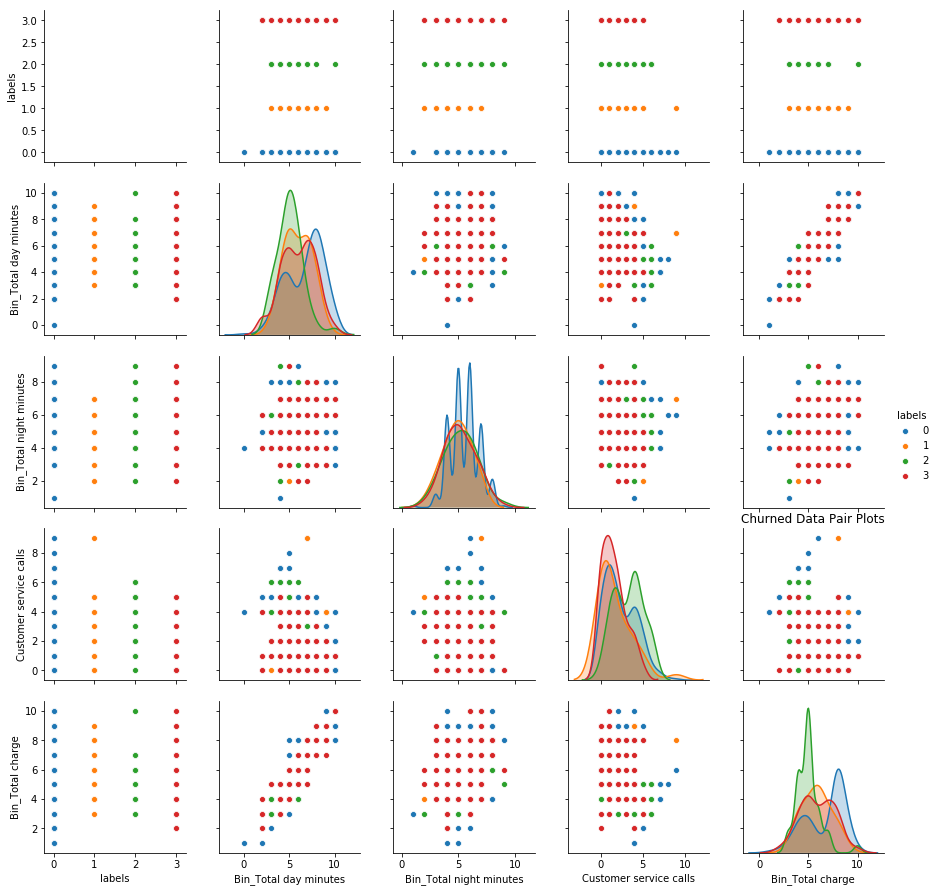

In [17]:
sns.pairplot(teledf_churn[['labels','Bin_Total day minutes','Bin_Total night minutes', 

                           'Customer service calls','Bin_Total charge']], hue = 'labels')

plt.title('Churned Data Pair Plots')
plt.show()

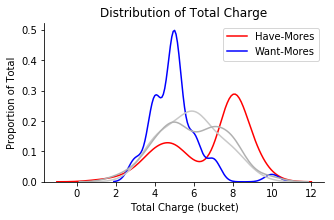

In [67]:
#visualizations for presentation


g = sns.FacetGrid(teledf_churn, hue="labels", hue_order = [0,2,1,3], palette = ['r','b','#C9C9C9','#B0B0B0'])
g = g.map(sns.kdeplot, "Bin_Total charge")



plt.title('Distribution of Total Charge')
plt.xlabel('Total Charge (bucket)')
plt.ylabel('Proportion of Total')
plt.legend(['Have-Mores','Want-Mores'])

fig = plt.gcf()
fig.set_size_inches(5,3)

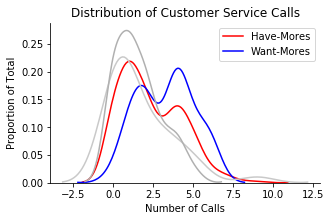

In [68]:

g = sns.FacetGrid(teledf_churn, hue="labels", hue_order = [0,2,1,3], palette = ['r','b','#C9C9C9','#B0B0B0'])
g = g.map(sns.kdeplot, "Customer service calls")

plt.title('Distribution of Customer Service Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Proportion of Total')

plt.legend(['Have-Mores','Want-Mores'])

fig = plt.gcf()
fig.set_size_inches(5,3)

In [51]:
havemores = teledf_churn[teledf_churn['labels']==0]
wantmores = teledf_churn[teledf_churn['labels']==2]

In [53]:
havemores.columns


Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total intl calls', 'Customer service calls',
       'Churn', 'Bin_Total day minutes', 'Bin_Total day calls',
       'Bin_Total day charge', 'Bin_Total eve minutes', 'Bin_Total eve calls',
       'Bin_Total eve charge', 'Bin_Total night minutes',
       'Bin_Total night calls', 'Bin_Total night charge',
       'Bin_Total intl minutes', 'Bin_Total intl charge', 'Bin_Total minutes',
       'Bin_Total calls', 'Bin_Total charge', 'Bin_Account length', 'labels'],
      dtype='object')

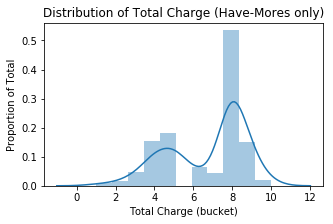

In [58]:



sns.distplot(havemores['Bin_Total charge'])


plt.title('Distribution of Total Charge (Have-Mores only)')
plt.xlabel('Total Charge (bucket)')
plt.ylabel('Proportion of Total')

fig = plt.gcf()
fig.set_size_inches(5,3)

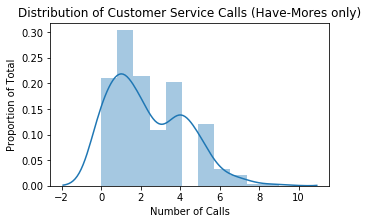

In [59]:

sns.distplot(havemores['Customer service calls'])

plt.title('Distribution of Customer Service Calls (Have-Mores only)')
plt.xlabel('Number of Calls')
plt.ylabel('Proportion of Total')

fig = plt.gcf()
fig.set_size_inches(5,3)

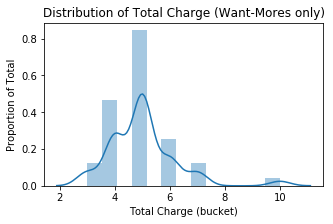

In [60]:



sns.distplot(wantmores['Bin_Total charge'])


plt.title('Distribution of Total Charge (Want-Mores only)')
plt.xlabel('Total Charge (bucket)')
plt.ylabel('Proportion of Total')

fig = plt.gcf()
fig.set_size_inches(5,3)

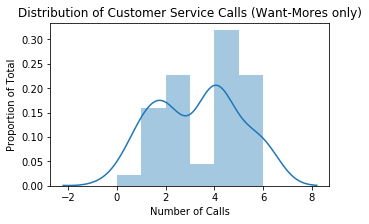

In [61]:

sns.distplot(wantmores['Customer service calls'])

plt.title('Distribution of Customer Service Calls (Want-Mores only)')
plt.xlabel('Number of Calls')
plt.ylabel('Proportion of Total')

fig = plt.gcf()
fig.set_size_inches(5,3)

In [62]:
havemores.shape, wantmores.shape

((302, 24), (44, 24))

In [72]:
comparison = [(havemores['Bin_Total charge'].mean(), wantmores['Bin_Total charge'].mean(),
              teledf_churn['Bin_Total charge'].mean()),
              (havemores['Customer service calls'].mean(), wantmores['Customer service calls'].mean(),
               teledf_churn['Customer service calls'].mean())]

pd.DataFrame(comparison)

,0,1,2
0,6.738411,5.000000,6.349896
1,2.357616,3.295455,2.229814
